In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import random
from sklearn import decomposition
from sklearn.metrics import r2_score
random.seed(42)
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
!git clone https://github.com/ShihaoCui/Mydata_1.git

Cloning into 'Mydata_1'...
remote: Enumerating objects: 512, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 512 (delta 82), reused 137 (delta 34), pack-reused 326
Receiving objects: 100% (512/512), 356.55 MiB | 25.53 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Updating files: 100% (278/278), done.


# Data processing

In [6]:
## Data Load
filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 2_PrintablityPredictor/Case 1/x_train.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
x_train = data['x_train']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 2_PrintablityPredictor/Case 1/y_train.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
y_train = data['y_train']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 2_PrintablityPredictor/Case 1/x_test.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
x_test = data['x_test']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 2_PrintablityPredictor/Case 1/y_test.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
y_test = data['y_test']

In [7]:
RandState=59

In [8]:
y_train.shape

(38, 3)

In [9]:
y_test.shape

(10, 3)

# 1. Height:  Data for model traning and testing

In [12]:
x_train.shape

(38, 12)

In [11]:
y_train.shape

(38, 3)

In [13]:
x_train.shape

(38, 12)

In [14]:
y_train.shape

(38, 3)

In [15]:
x_test.shape

(10, 12)

In [16]:
y_test.shape

(10, 3)

In [18]:
# plt.plot(y_train)

### DNNs

In [19]:
from keras.layers import Activation, Dense,BatchNormalization
model= Sequential()
model.add(Dense((128),batch_input_shape=(None,x_train.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense((128)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense((32)))
model.add(Activation('relu'))
model.add(Dense((16)))
model.add(Activation('relu'))
model.add(Dense((16)))
model.add(Activation('softmax'))
model.add(Dense((3)))
model.compile(loss = 'mse',optimizer = 'RMSprop',metrics=['accuracy']) #categorical_crossentropy
model.summary()# RMSprop

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4

In [20]:
history2 = model.fit(x_train,y_train,epochs=1000,batch_size=2,validation_data=(x_test,y_test))

Epoch 1/1000
19/19 [==============================] - 4s 14ms/step - loss: 0.2614 - accuracy: 0.3421 - val_loss: 0.2456 - val_accuracy: 0.4000
Epoch 2/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.3421 - val_loss: 0.2290 - val_accuracy: 0.4000
Epoch 3/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.2310 - accuracy: 0.3421 - val_loss: 0.2234 - val_accuracy: 0.4000
Epoch 4/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.3421 - val_loss: 0.2203 - val_accuracy: 0.4000
Epoch 5/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.3158 - val_loss: 0.2189 - val_accuracy: 0.4000
Epoch 6/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.3421 - val_loss: 0.2183 - val_accuracy: 0.4000
Epoch 7/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.2895 - val_loss: 0.2179 - val_accuracy: 0.4000
Epoch

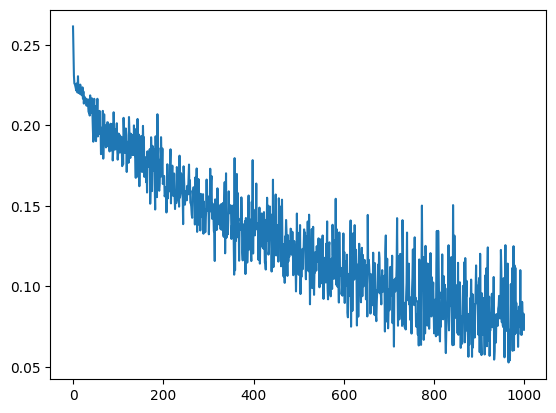

In [21]:
# Loss: convergence or not
plt.plot(history2.history['loss'])
plt.show()

In [22]:
# 保存为 MATLAB mat 文件
matfile_content = {'loss': history2.history['loss']}
savemat('loss.mat', matfile_content)


In [23]:
# y_train.shape
# results_d_train.shape

2/2 [==============================] - 0s 3ms/step


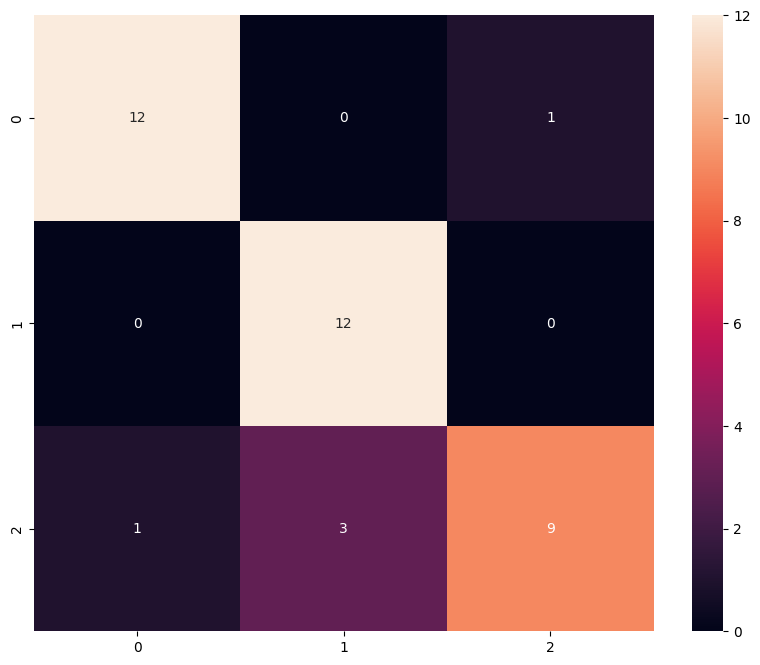

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(x_train)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_prediction,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_train,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", color = 'g');

In [25]:
x_test.shape

(10, 12)

1/1 [==============================] - 0s 20ms/step


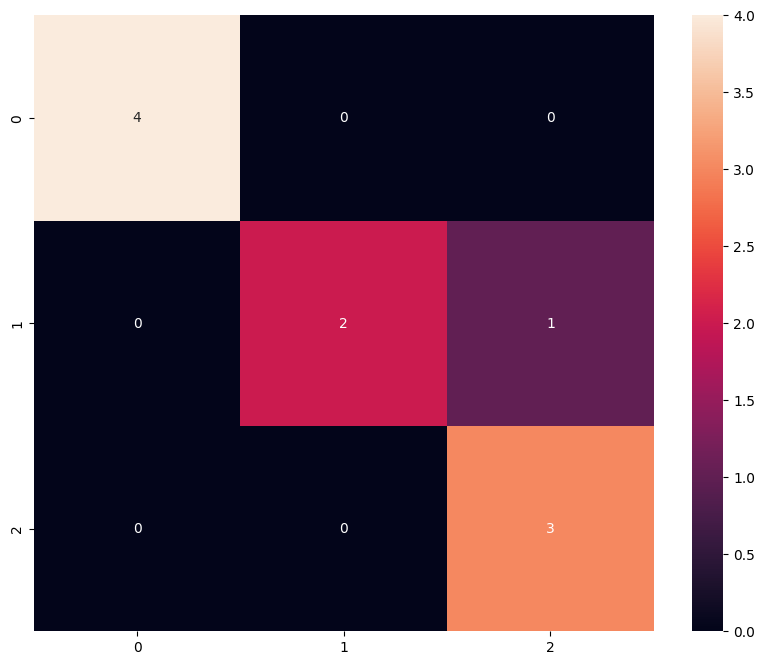

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_prediction,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", color = 'g');

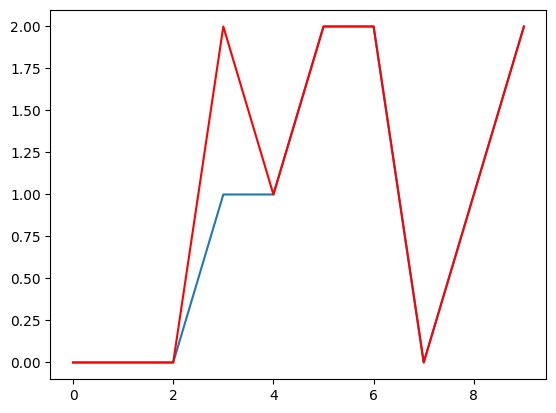

In [27]:
y_true.shape
y_pred_classes
plt.plot(y_true)
plt.plot(y_pred_classes,c='r')